# Final Practice (Optional)

## Question 3: Sparse Imaging

This example generates a sparse signal and tries to recover it using the Orthogonal Matching Pursuit algorithm.

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc
from IPython import display
import sys
%matplotlib inline

def randMasks(numMasks, numPixels):
    randNormalMat = np.random.normal(0,1,(numMasks,numPixels))
    # make the columns zero mean and normalize
    for k in range(numPixels):
        # make zero mean
        randNormalMat[:,k] = randNormalMat[:,k] - np.mean(randNormalMat[:,k])
        # normalize to unit norm
        randNormalMat[:,k] = randNormalMat[:,k] / np.linalg.norm(randNormalMat[:,k])
    A = randNormalMat.copy()
    Mask = randNormalMat - np.min(randNormalMat)    
    return Mask,A

def simulate():
    # read the image in grayscale
    I = np.load('helper.npy')
    sp = np.sum(I)
    numMeasurements = 6500
    numPixels = I.size
    Mask, A = randMasks(numMeasurements,numPixels)
    full_signal = I.reshape((numPixels,1))
    measurements = np.dot(Mask,full_signal)
    measurements = measurements - np.mean(measurements)
    return measurements, A    

### Part (a)

In [3]:
measurements, A = simulate()

# THE SETTINGS FOR THE IMAGE - PLEASE DO NOT CHANGE
height = 91
width = 120
sparsity = 476
numPixels = len(A[0])

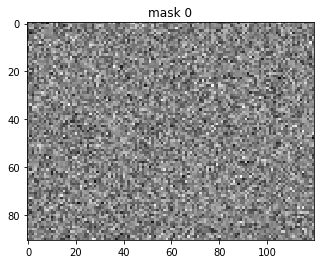

In [4]:
# CHOOSE DIFFERENT MASKS TO PLOT
chosenMaskToDisplay = 0

M0 = A[chosenMaskToDisplay].reshape((height,width))
plt.title('mask %d'%chosenMaskToDisplay)
plt.imshow(M0, cmap=plt.cm.gray, interpolation='nearest');

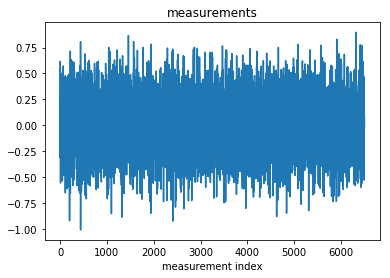

In [5]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

In [7]:
# OMP algorithm
# THERE ARE MISSING LINES THAT YOU NEED TO FILL
def OMP(imDims, sparsity, measurements, A):
    r = measurements.copy()
    indices = []
    
    # Threshold to check error. If error is below this value, stop.
    THRESHOLD = 0.1
    
    # For iterating to recover all signal
    i = 0
    
    while i < sparsity and np.linalg.norm(r) > THRESHOLD: 
       # Calculate the inner products of r with columns of A
        print('%d - '%i,end="",flush=True)
        simvec = A.T.dot(r)

        # Choose pixel location with highest inner product and add to collection
        # COMPLETE THE LINE BELOW
        best_index = np.argmax(np.abs(simvec))
        indices.append(best_index)

        # Build the matrix made up of selected indices so far
        # COMPLETE THE LINE BELOW
        Atrunc = A[:,indices]

        # Find orthogonal projection of measurements to subspace
        # spanned by recovered codewords
        b = measurements
        # COMPLETE THE LINE BELOW
        xhat = np.linalg.lstsq(Atrunc, b)[0]  

        # Find component orthogonal to subspace to use for next measurement
        # COMPLETE THE LINE BELOW
        r = b - Atrunc.dot(xhat)

        # This is for viewing the recovery process
        if i % 10 == 0 or i == sparsity-1 or np.linalg.norm(r) <= THRESHOLD:
            recovered_signal = np.zeros(numPixels)
            for j, x in zip(indices, xhat):
                recovered_signal[j] = x
            Ihat = recovered_signal.reshape(imDims)
            plt.title('estimated image')
            plt.imshow(Ihat, cmap=plt.cm.gray, interpolation='nearest') 
            display.clear_output(wait=True)
            display.display(plt.gcf())
        
        i = i + 1
        
    display.clear_output(wait=True)

    # Fill in the recovered signal
    recovered_signal = np.zeros(numPixels)
    for i, x in zip(indices, xhat):
        recovered_signal[i] = x
    
    return recovered_signal

### Part (b)

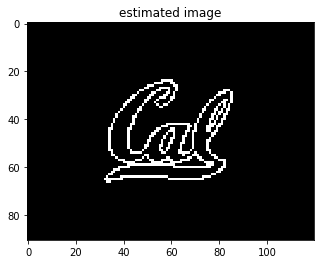

In [8]:
rec = OMP((height,width), sparsity, measurements, A)

### PRACTICE: Part (c)

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


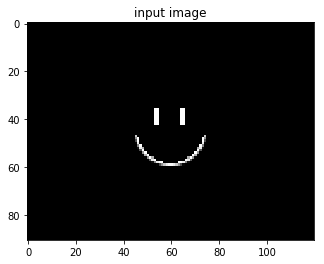

In [12]:
# the setting

# file name for the sparse image
fname = 'smiley.png'
# number of measurements to be taken from the sparse image
numMeasurements = 6500
# the sparsity of the image
sparsity = 400

# read the image in black and white
I = misc.imread(fname, flatten=1)
# normalize the image to be between 0 and 1
I = I/np.max(I)

# shape of the image
imageShape = I.shape
# number of pixels in the image
numPixels = I.size

plt.title('input image')
plt.imshow(I, cmap=plt.cm.gray, interpolation='nearest');

In [13]:
# generate your image masks and the underlying measurement matrix
Mask, A = randMasks(numMeasurements,numPixels)
# vectorize your image
full_signal = I.reshape((numPixels,1))
# get the measurements
measurements = np.dot(Mask,full_signal)
# remove the mean from your measurements
measurements = measurements - np.mean(measurements)

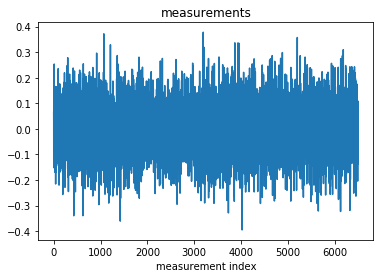

In [14]:
# measurements
plt.title('measurements')
plt.plot(measurements)
plt.xlabel('measurement index')
plt.show()

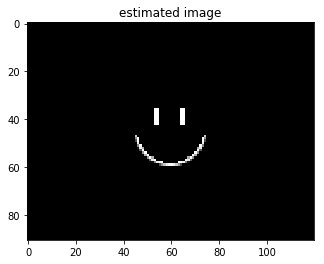

In [15]:
rec = OMP(imageShape, sparsity, measurements, A)

## Question 4: How Much is Too Much?

### Some Setup Code

In [1]:
import numpy as np
import numpy.matlib
import matplotlib.pyplot as plt

%matplotlib inline

"""Function that defines the polynomial curve for a set of 
parameters and a range. The set of parameters defines the 
degree of the polynomial."""
def poly_curve(params,x_input):
    # params contains the coefficients that multiply the polynomial terms, in degree of lowest degree to highest degree
    degree=len(params)-1
    x_range=[x_input[1], x_input[-1]]
    x=np.linspace(x_range[0],x_range[1],1000)
    y=x*0
    
    for k in range(0,degree+1):
        coeff=params[k]
        y=y+list(map(lambda z:coeff*z**k,x))        
    return x,y
    
"""Function that defines a data matrix for some input data."""
def data_matrix(input_data,degree): 
    # degree is the degree of the polynomial you plan to fit the data with    
    Data=np.zeros((len(input_data),degree+1))
    
    for k in range(0,degree+1):
        Data[:,k]=(list(map(lambda x:x**k ,input_data)))
                  
    return Data

"""Function that computes the Least Squares Approximation"""
def leastSquares(D,y): 
    return np.linalg.lstsq(D,y)[0]
                  
np.random.seed(10)

## Part a) 
Some setup code to create our Resistor test Data points and plot them

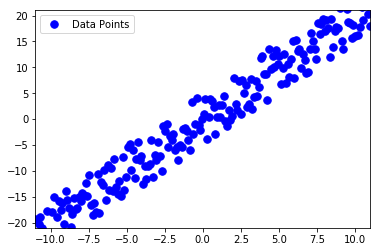

In [2]:
R = 2
x_a = np.linspace(-11,11,200)
y_a = R*x_a + (np.random.rand(len(x_a))-0.5)*10
fig = plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
ax.plot(x_a,y_a, '.b', markersize=15)
ax.legend(['Data Points'])

Let's calculate a polynomial approximation of the above device. 

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5,1,'Polynomial of Degree 15')

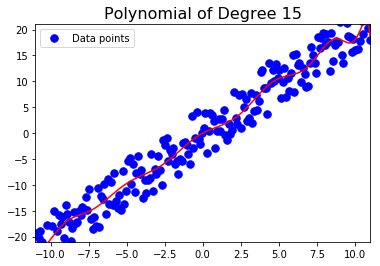

In [3]:
degree=15
D_a = data_matrix(x_a,degree)
p_a = leastSquares(D_a, y_a)

fig=plt.figure()
ax=fig.add_subplot(111,xlim=[-11,11],ylim=[-21,21])
x_a_,y_a_=poly_curve(p_a,x_a)
ax.plot(x_a,y_a,'.b',markersize=15)
ax.plot(x_a_, y_a_, 'r')
ax.legend(['Data points'])
plt.title('Polynomial of Degree %d' %(len(p_a)-1),fontsize=16)


## Part b)

In [4]:
def cost(x, y, start, end):
    """Given a set of x and y points, this function 
    calculates polynomial approximations of varying 
    degrees from start to end and returns the cost 
    of each degree in an array"""
    c = []
    for degree in range(start, end):
        D = data_matrix(x,degree)
        params = leastSquares(D,y)
        error = np.linalg.norm(y-np.dot(D,params))
        c.append(error)
    return c

/usr/local/Cellar/ipython/7.7.0/libexec/vendor/lib/python3.7/site-packages/ipykernel_launcher.py:34: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


Text(0.5,1,'Cost vs Degree')

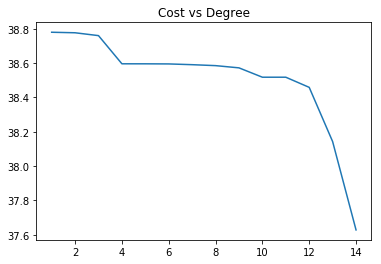

In [5]:
start = 1
end = 15
fig=plt.figure()
ax=fig.add_subplot(111)
ax.plot(range(start, end), cost(x_a,y_a,start,end))
plt.title('Cost vs Degree')